# Import lots of stuff

In [3]:
import pandas as pd
import pylab as pyl
import nltk as nltk
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
import re

# Testing Tokenizer

In [4]:
from nltk.tokenize import word_tokenize
s = '''Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\nThanks.'''
text1 = word_tokenize(s)
# len(text1)
text1

text = word_tokenize("1 I will now stand on the table and sing abiu my love")
nltk.pos_tag(text)

brownText = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
#text.similar('woman')
brownText

<Text: the fulton county grand jury said friday an...>

# Import merged file with annotated tangram names

In [5]:
merged = pd.read_csv('merged.csv')
test1 = merged.copy()

CParserError: Error tokenizing data. C error: Expected 6 fields in line 7, saw 8


# Create Token, word count, Part of Speech columns for nouns, verbs, etc

In [4]:
#enable longer display
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#all of the different gameIDs
pd.unique(test1.gameid.ravel())

test2 = test1.copy()
del test2['time']

#create token colum
test2['tokens'] = [[word for word in nltk.word_tokenize(sentence.lower()) if word.isalpha()] for sentence in test2['contents']]
#number of words total

#create part of speech column
test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]

#create number of words in contents column
test2['numWords'] = [pd.value_counts(words).sum() for words in test2['tokens']]

#remove tangram 0
test2 = test2[test2.tangram != '0']
test2 = test2[test2.tangram != '*']
#only look at tangram C
#test2 = test2[test2.tangram == 'C']


# USE FOR COUNTING words of a given type of speech #

#counts up the numbers associated with each word in a list
def total(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = l[i][1]
        count += num
    else: 
        return count
#count up the numbers associated with each word in list of lists (need .values() for dict)
def totalAll(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = total(l[i])
        count += num
    else:
        return count
    
#given a tag (like NN) find all the words tagged with that and their frequency
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())


# TAG PARTS OF SPEECH + COUNT THEM

#show words and number of words that are NN for each row of tags
test2['NN'] = [findtags('NN', text) for text in test2['pos']]

#count number of NN words 
test2['NNnum'] = [totalAll(text.values()) for text in test2['NN']]

#show words and number of words that are VB for each row of tags
test2['VB'] = [findtags('VB', text) for text in test2['pos']]

#count number of VB words 
test2['VBnum'] = [totalAll(text.values()) for text in test2['VB']]

#show words and number of words that are DT for each row of tags
test2['DT'] = [findtags('DT', text) for text in test2['pos']]

#count number of DT words 
test2['DTnum'] = [totalAll(text.values()) for text in test2['DT']]

#show words and number of words that are PRP for each row of tags
test2['PRP'] = [findtags('PRP', text) for text in test2['pos']]

#count number of PRP words 
test2['PRPnum'] = [totalAll(text.values()) for text in test2['PRP']]

#show words and number of words that are IN for each row of tags
test2['IN'] = [findtags('IN', text) for text in test2['pos']]

#count number of IN words 
test2['INnum'] = [totalAll(text.values()) for text in test2['IN']]

#show words and number of words that are TO for each row of tags
test2['TO'] = [findtags('TO', text) for text in test2['pos']]

#count number of TO words 
test2['TOnum'] = [totalAll(text.values()) for text in test2['TO']]

#show words and number of words that are RB for each row of tags
test2['RB'] = [findtags('RB', text) for text in test2['pos']]

#count number of RB words
test2['RBnum'] = [totalAll(text.values()) for text in test2['RB']]

completeTangramContents = test2
#allTangramsFreqs.to_csv("allTangramsFreqs.csv") 

height has been deprecated.



In [6]:
from IPython.display import Image
Image(filename='tangrams_board.png') 
test2

gameid  roundNum    sender  \
1     0215-4         1  director   
3     0215-4         1  director   
4     0215-4         1   matcher   
5     0215-4         1  director   
7     0215-4         1  director   
8     0215-4         1  director   
10    0215-4         1  director   
11    0215-4         1  director   
12    0215-4         1  director   
16    0215-4         1  director   
18    0215-4         1  director   
20    0215-4         1  director   
22    0215-4         1  director   
24    0215-4         1  director   
26    0215-4         1  director   
27    0215-4         1   matcher   
28    0215-4         1  director   
32    0215-4         2  director   
34    0215-4         2  director   
36    0215-4         2  director   
37    0215-4         2   matcher   
40    0215-4         2  director   
42    0215-4         2  director   
43    0215-4         2   matcher   
44    0215-4         2  director   
46    0215-4         2  director   
48    0215-4         2  director   
50    0215-4         2  director   
52    0215-4         2  director   
54    0215-4         2  director   
56    0215-4         2  director   
57    0215-4         2   matcher   
61    0215-4         3  director   
63    0215-4         3  director   
65    0215-4         3  director   
67    0215-4         3  director   
69    0215-4         3  director   
71    0215-4         3  director   
73    0215-4         3  director   
75    0215-4         3  director   
77    0215-4         3  director   
79    0215-4         3  director   
81    0215-4         3  director   
82    0215-4         3   matcher   
83    0215-4         3  director   
87    0215-4         4  director   
89    0215-4         4  director   
91    0215-4         4  director   
92    0215-4         4  director   
94    0215-4         4  director   
96    0215-4         4  director   
98    0215-4         4  director   
100   0215-4         4  director   
102   0215-4         4  director   
104   0215-4         4  director   
106   0215-4         4  director   
108   0215-4         4  director   
109   0215-4         4  director   
111   0215-4         5  director   
113   0215-4         5  director   
115   0215-4         5  director   
117   0215-4         5  director   
119   0215-4         5  director   
121   0215-4         5  director   
123   0215-4         5  director   
125   0215-4         5  director   
127   0215-4         5  director   
129   0215-4         5  director   
131   0215-4         5  director   
132   0215-4         5   matcher   
135   0215-4         6  director   
137   0215-4         6  director   
139   0215-4         6  director   
141   0215-4         6  director   
143   0215-4         6  director   
145   0215-4         6  director   
147   0215-4         6  director   
149   0215-4         6  director   
151   0215-4         6  director   
153   0215-4         6  director   
155   0215-4         6  director   
161   0619-a         1  director   
162   0619-a         1   matcher   
165   0619-a         1  director   
167   0619-a         1  director   
169   0619-a         1   matcher   
170   0619-a         1  director   
172   0619-a         1   matcher   
174   0619-a         1  director   
176   0619-a         1   matcher   
178   0619-a         1  director   
179   0619-a         1  director   
180   0619-a         1   matcher   
183   0619-a         1  director   
185   0619-a         1   matcher   
187   0619-a         1  director   
188   0619-a         1   matcher   
193   0619-a         1   matcher   
194   0619-a         1  director   
195   0619-a         1   matcher   
197   0619-a         1  director   
198   0619-a         1  director   
199   0619-a         1   matcher   
200   0619-a         1  director   
201   0619-a         1   matcher   
202   0619-a         1   matcher   
203   0619-a         1  director   
215   0619-a         2  director   
216   0619-a         2   matcher   
217   0619-a         2  director   
218   0619

#Calculate indicator words for tangrams/rounds


In [66]:
def getWordCounts(df, gameid, roundNum, tangram = None) :
    roundCond = 'roundNum == ' + roundNum
    gameidCond = 'gameid == "' + gameid + '"'
    if(tangram is not None) :
        tangramCond = 'tangram == "' + tangram + '"'
        cond = " and ".join((roundCond, gameidCond, tangramCond))
    else :
        cond = " and ".join((roundCond, gameidCond))
    relevantRow = df.query(cond)
    return Counter([item for sublist in relevantRow['tokens'].tolist() 
                    for item in sublist])

#creates mini dataframe that grabs the words used in round 6 for a given tangram and gameid
def selectTangramRoundWords(tangram, roundNum, gameid):
    wordCounts = getWordCounts(test2, gameid, roundNum, tangram)
    tokenList = pd.DataFrame(wordCounts.items(), 
                             columns=['word', 'count'])
    return tokenList[['word']]

In [53]:
import itertools
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#https://en.wikipedia.org/wiki/Pointwise_mutual_information

#returns a table with the all words about 0 PMI and their counts for a given tangram
#calculate the probability for words given tangram A ------ p(x|y)

# Note that we're reconstructing totalCounts for every tangram... 
def makeMyPMI(tangram, roundNum, gameid):

    # count words w/in tangram
    tangramCounts = getWordCounts(test2, gameid, roundNum, tangram)
    totalCounts = getWordCounts(test2, gameid, roundNum)

    #total number of words 
    tangramNumWords = (1 if sum(tangramCounts.values()) == 0 
                       else sum(tangramCounts.values()))
    totalNumWords = float(sum(totalCounts.values()))

    #dataframe to compare 
    indicatorDF = pd.merge(pd.DataFrame(tangramCounts.items(), columns=['word', 'count']),
                           pd.DataFrame(totalCounts.items(), columns=['word', 'totalCount']),
                           on='word', how = 'inner')

    # The equation is like this: log((P(word|A)/P(word))). 
    # The P(word) is looking at the global likelihood of that word being used
    # among all the tangrams

    #calculate PMI without log first. Having trouble with float issues. 
    indicatorDF['roughPMI'] = ((indicatorDF['count']/tangramNumWords)
                                / (indicatorDF['totalCount']/totalNumWords))
    indicatorDF['logPMI'] = [math.log10(num) for num in indicatorDF['roughPMI']]
    
    #indicatorAdf
    highPMI = indicatorDF[indicatorDF['logPMI'] > -1]
    highPMI = highPMI.sort(['logPMI'], ascending=0)
    
    #insert tangram and roundNum and gameid
    highPMI['gameid'] = gameid
    highPMI['tangram'] = tangram
    highPMI['roundNum'] = roundNum
    
    #rearragne columns
    cols = highPMI.columns.tolist()
    cols = cols[-3:] + cols[:-3]
    highPMI = highPMI[cols]
    
    #remove column rough PMI
    highPMI = highPMI.drop('roughPMI', 1)
    
    return highPMI

In [65]:
#grab words with highestPMI
def highestPMI(tangram, roundNum, gameid):
    PMIdf = makeMyPMI(tangram, roundNum, gameid)
    #if PMIdf has words, pull out max values, it is empty return it as is
    if len(PMIdf.index) > 0:
        PMI_values = PMIdf.logPMI.unique()
        maxPMI = PMI_values.max()
        PMIdf = PMIdf.loc[PMIdf['logPMI'] == maxPMI]
        #just return word column
        PMIdf = PMIdf[['word']]
        return PMIdf
    #if PMIdf is empty, return it as is
    else: 
        return PMIdf

#function to randomly sample a word from the list of words used by a group for a given tangram on round 1
def randomWord(wordDataframe):
    if len(wordDataframe.index) == 0:
        return wordDataframe
    else: 
        rows = np.random.choice(wordDataframe.index.values, 1)
        randomSample = wordDataframe.ix[rows]
        return randomSample

#create dataframe of words used in round 6 and the words that had the highest pmi in round 1
def mergePmiRounds(tangram, gameid):
    round1 = highestPMI(tangram, 1, gameid)
    round6 = selectTangramRoundWords(tangram, 6, gameid)
    innerMerge = pd.merge(round1, round6, on = 'word', how='inner')
    return innerMerge

# measures if the words in round 6 had a highPMI in round 1. If they do, return a 1. If not, return 0. 
def continuityCount(innerMerge):
    continuityCount = 0 
    if len(innerMerge.index) > 0:
        continuityCount += 1
    else:
        continuityCount = 0
    return continuityCount

#takes in a string and turns it into a list
def listify(word):
    l = []
    l.append(word)
    return l

#given a pos tag like this: [('person', 'NN')], determine if the word is a noun
def isWordNoun(posTag):
    if posTag[0][1] == 'NN':
        return True
    else:
        return False

#function which only keeps nouns in dataframe word column
def filterForNoun(df):
    df['token'] = [listify(word) for word in df['word']]
    df['pos'] = [nltk.pos_tag(token) for token in df['token']]
    df['noun'] = [isWordNoun(postag) for postag in df['pos']]
    df = df[df.noun == True]
    df = df[['word']]
    return df


def PMImatches(highPMI_df, round6_df):
    if len(highPMI_df.index) == 0:
        return 0
    else:
        highPMI_wordList = highPMI_df['word'].tolist()
        length = len(highPMI_wordList)
        round6_wordList = round6_df['word'].tolist()
        count = 0
        for i in range(length):
            if highPMI_wordList[i] in round6_wordList:
                count += 1
            else:
                count += 0
        return float(count)/length
    
def nullmatches(round1_df, round6_df):
    if len(round1_df.index) == 0:
        return 0
    else:
        random_round1_df = randomWord(round1_df)
        random_round1_list = random_round1_df['word'].tolist()
        round6_list = round6_df['word'].tolist()
        count = 0
        if random_round1_list[0] in round6_list:
             return 1
        else:
            return 0
    

#gamids
gameidList = pd.unique(test1.gameid.ravel()).tolist()
# ['0215-4', '0619-a', '1903-d', '2121-8', '2388-c', '2878-d',
#        '3409-e', '3423-d', '3682-d', '3891-4', '4060-2', '4404-5',
#        '4800-3', '6510-9', '7764-f', '9440-7', '0770-e', '1490-f',
#        '2760-0', '4927-0', '5204-4', '7264-8', '8762-d', '9409-4']
#tangrams
tangramList = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


#picks a highest PMI word from round 1 (for tangram/gameid) and sees if it is used in round 6. Calculates proportion of this over 288 tangram/gameid situations
def totalContinuity():
    totalContinuity = 0
    for gameid in gameidList:    
        for tangram in tangramList:
            highPMIwordList = highestPMI(tangram, 1, gameid)
            #random_highPMIWord = randomWord(highPMIwordList)
            round6WordList = selectTangramRoundWords(tangram, 6, gameid)
            score = PMImatches(highPMIwordList, round6WordList)
            totalContinuity = totalContinuity + score
    return float(totalContinuity)/288


#totalContinuity()

#picks a random noun from round 1 (for tangram/gameid) and sees if it is used in round 6. Calculates proportion, given that is does this 288 times
def nullDistribution():
    totalContinuity = 0
    for gameid in gameidList:    
        for tangram in tangramList:
            round1tangramWordList = selectTangramRoundWords(tangram, "1", gameid)
#             nounOnlyWordList = filterForNoun(round1tangramWordList)
#             random_round1Word = randomWord(nounOnlyWordList)
#             random_round1Word = randomWord(round1tangramWordList)
            round6WordList = selectTangramRoundWords(tangram, "6", gameid)
            score = nullmatches(round1tangramWordList, round6WordList) 
            totalContinuity = totalContinuity +  score
    return float(totalContinuity)/288



    
# tester = selectTangramRoundWords('A', 1, '0215-4')
# tester = filterForNoun(tester)
# tester

PMI_distribution = []
def longDistribution():
    for i in range(100):
        proportion = nullDistribution() 
        PMI_distribution.append(proportion)
    return PMI_distribution

# PMI_distribution_lists = [0.4305555555555556, 0.4513888888888889]
# null_distribution_lists = [0.2847222222222222, 0.2708333333333333]
# null_noun_distribution_lists = [0.3611111111111111]
#nullDistribution()
#totalContinuity()



    
# round1Test = highestPMI('E', 1, '0215-4')
# round6Test = selectTangramRoundWords('E', 6, '0215-4')
# nullmatches(round1Test, round6Test)


# 'pup' in [ 'dog', 'kitten']
# randomPMI['word'].tolist()[0] in round6Test['word'].tolist()
# round6Test['word'].tolist()
    
# PMImatches(round1Test, round6Test)
# highPMITest
# round6Test
# nullDistribution()
# nullDistributionLongList = longDistribution()
longDistribution()


[0.14583333333333334,
 0.18055555555555555,
 0.19444444444444445,
 0.1736111111111111,
 0.15625,
 0.17708333333333334,
 0.17708333333333334,
 0.1527777777777778,
 0.16319444444444445,
 0.14930555555555555,
 0.17708333333333334,
 0.19791666666666666,
 0.1840277777777778,
 0.1597222222222222,
 0.13194444444444445,
 0.16666666666666666,
 0.13541666666666666,
 0.1597222222222222,
 0.18055555555555555,
 0.14930555555555555,
 0.1875,
 0.1597222222222222,
 0.1736111111111111,
 0.18055555555555555,
 0.16666666666666666,
 0.1527777777777778,
 0.15625,
 0.15625,
 0.17708333333333334,
 0.14930555555555555,
 0.16319444444444445,
 0.15625,
 0.16319444444444445,
 0.14930555555555555,
 0.16666666666666666,
 0.1701388888888889,
 0.1527777777777778,
 0.14583333333333334,
 0.1597222222222222,
 0.17708333333333334,
 0.13541666666666666,
 0.1423611111111111,
 0.16319444444444445,
 0.1527777777777778,
 0.16319444444444445,
 0.17708333333333334,
 0.1597222222222222,
 0.10416666666666667,
 0.1631944444444444

In [7]:


nullDistributionNums = [0.2013888888888889,
 0.19444444444444445,
 0.1423611111111111,
 0.1597222222222222,
 0.13541666666666666,
 0.1527777777777778,
 0.13194444444444445,
 0.17708333333333334,
 0.1388888888888889,
 0.1597222222222222,
 0.1597222222222222,
 0.16666666666666666,
 0.1423611111111111,
 0.21180555555555555,
 0.1527777777777778,
 0.16319444444444445,
 0.1840277777777778,
 0.1423611111111111,
 0.18055555555555555,
 0.15625,
 0.17708333333333334,
 0.1701388888888889,
 0.19444444444444445,
 0.1701388888888889,
 0.16666666666666666,
 0.1701388888888889,
 0.1597222222222222,
 0.1527777777777778,
 0.14930555555555555,
 0.1388888888888889,
 0.2048611111111111,
 0.16666666666666666,
 0.14583333333333334,
 0.1736111111111111,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.15625,
 0.1388888888888889,
 0.1423611111111111,
 0.1527777777777778,
 0.1597222222222222,
 0.2048611111111111,
 0.15625,
 0.15625,
 0.1597222222222222,
 0.1597222222222222,
 0.13541666666666666,
 0.1527777777777778,
 0.16319444444444445,
 0.16666666666666666,
 0.1423611111111111,
 0.16666666666666666,
 0.1736111111111111,
 0.1388888888888889,
 0.18055555555555555,
 0.14930555555555555,
 0.15625,
 0.1701388888888889,
 0.14583333333333334,
 0.15625,
 0.18055555555555555,
 0.1597222222222222,
 0.1597222222222222,
 0.17708333333333334,
 0.13541666666666666,
 0.14583333333333334,
 0.1284722222222222,
 0.1527777777777778,
 0.2048611111111111, 
 0.1527777777777778,
 0.1527777777777778,
 0.1527777777777778,
 0.1423611111111111,
 0.1597222222222222,
 0.1388888888888889,
 0.1701388888888889,
 0.1597222222222222,
 0.1597222222222222,
 0.17708333333333334,
 0.16319444444444445,
 0.14930555555555555,
 0.1597222222222222,
 0.1527777777777778,
 0.14930555555555555,
 0.1423611111111111,
 0.15625,
 0.1736111111111111,
 0.1597222222222222,
 0.1701388888888889,
 0.1527777777777778,
 0.1423611111111111,
 0.15625,
 0.1388888888888889,
 0.19791666666666666,
 0.14583333333333334,
 0.17708333333333334,
 0.1388888888888889,
 0.1909722222222222,
 0.14583333333333334,
 0.1875,
 0.16666666666666666,
 0.19444444444444445,
 0.16319444444444445,
 0.15625,
 0.1527777777777778,
 0.1701388888888889,
 0.12152777777777778,
 0.1701388888888889,
 0.13194444444444445,
 0.1597222222222222,
 0.1388888888888889,
 0.1736111111111111,
 0.1527777777777778,
 0.14930555555555555,
 0.16319444444444445,
 0.1527777777777778,
 0.14583333333333334,
 0.13541666666666666,
 0.1875,
 0.1597222222222222,
 0.16666666666666666,
 0.1909722222222222,
 0.1597222222222222,
 0.16319444444444445,
 0.14930555555555555,
 0.1909722222222222,
 0.1527777777777778,
 0.14930555555555555,
 0.1527777777777778,
 0.1736111111111111,
 0.18055555555555555,
 0.1423611111111111,
 0.15625,
 0.1840277777777778,
 0.1388888888888889,
 0.16319444444444445,
 0.14930555555555555,
 0.16319444444444445,
 0.16319444444444445,
 0.1840277777777778,
 0.19791666666666666,
 0.1597222222222222,
 0.1388888888888889,
 0.1736111111111111,
 0.1423611111111111,
 0.13541666666666666,
 0.15625,
 0.1875,
 0.1597222222222222,
 0.16319444444444445,
 0.1597222222222222,
 0.1423611111111111,
 0.1597222222222222,
 0.1875,
 0.13194444444444445,
 0.16319444444444445,
 0.1423611111111111,
 0.16666666666666666,
 0.1388888888888889,
 0.14930555555555555,
 0.1527777777777778,
 0.16319444444444445,
 0.1423611111111111,
 0.1701388888888889,
 0.1388888888888889,
 0.15625,
 0.17708333333333334,
 0.19444444444444445,
 0.1736111111111111,
 0.1701388888888889,
 0.14583333333333334,
 0.16319444444444445,
 0.17708333333333334,
 0.14583333333333334,
 0.1875,
 0.16666666666666666,
 0.17708333333333334,
 0.16666666666666666,
 0.1527777777777778,
 0.1736111111111111,
 0.16666666666666666,
 0.11805555555555555,
 0.18055555555555555,
 0.16666666666666666,
 0.1701388888888889,
 0.1388888888888889,
 0.16666666666666666,
 0.14930555555555555,
 0.1909722222222222,
 0.17708333333333334,
 0.125,
 0.15625,
 0.1701388888888889,
 0.14930555555555555,
 0.11805555555555555,
 0.1597222222222222,
 0.14583333333333334,
 0.16666666666666666,
 0.16319444444444445]


#nullDistributionNums.to_csv("nullDistributionNums.csv")  
plt.hist(nullDistributionNums)

ImportError: No module named scipy

#Find confidence interval

In [10]:

from scipy import stats
import numpy as np
# import scipy as sp
# import scipy.stats

def mean_confidence_interval(nullDistributionNums, confidence=0.95):
    a = 1.0*np.array(nullDistributionNums)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

ImportError: No module named scipy

In [18]:
df1 = pd.DataFrame
df1 = df1({'test_set': nullDistributionNums})
df1

df1.to_csv("nullDistributionNums.csv") 

In [668]:

#apply filterForNoun to test2 dataframe
nounDataframe = test2.copy()

def selectTangramRoundWords(tangram, roundNum, gameID):
    lastRoundDf = test2.copy()
    lastRoundDf = lastRoundDf[lastRoundDf.gameid == gameid]
    lastRoundDf = lastRoundDf[lastRoundDf.tangram == tangram]
    lastRoundDf = lastRoundDf[lastRoundDf.roundNum == roundNum]
    lastRoundDf = lastRoundDf[['tokens']]
    #unlist tokens so that each row has a word in it
    tokenList = lastRoundDf['tokens'].tolist()
    tokenList = [item for sublist in tokenList for item in sublist]
    #get dictionary counter for words used for tangram A
    tokenList = Counter(tokenList)
    #turn the word list into a dataframe
    tokenList = pd.DataFrame(tokenList.items(), columns=['word', 'count'])
    #remove count column
    tokenList = tokenList[['word']]
    return tokenList

gameid  roundNum    sender  \
1     0215-4         1  director   
3     0215-4         1  director   
4     0215-4         1   matcher   
5     0215-4         1  director   
7     0215-4         1  director   
8     0215-4         1  director   
10    0215-4         1  director   
11    0215-4         1  director   
12    0215-4         1  director   
16    0215-4         1  director   
18    0215-4         1  director   
20    0215-4         1  director   
22    0215-4         1  director   
24    0215-4         1  director   
26    0215-4         1  director   
27    0215-4         1   matcher   
28    0215-4         1  director   
32    0215-4         2  director   
34    0215-4         2  director   
36    0215-4         2  director   
37    0215-4         2   matcher   
40    0215-4         2  director   
42    0215-4         2  director   
43    0215-4         2   matcher   
44    0215-4         2  director   
46    0215-4         2  director   
48    0215-4         2  director   
50    0215-4         2  director   
52    0215-4         2  director   
54    0215-4         2  director   
56    0215-4         2  director   
57    0215-4         2   matcher   
61    0215-4         3  director   
63    0215-4         3  director   
65    0215-4         3  director   
67    0215-4         3  director   
69    0215-4         3  director   
71    0215-4         3  director   
73    0215-4         3  director   
75    0215-4         3  director   
77    0215-4         3  director   
79    0215-4         3  director   
81    0215-4         3  director   
82    0215-4         3   matcher   
83    0215-4         3  director   
87    0215-4         4  director   
89    0215-4         4  director   
91    0215-4         4  director   
92    0215-4         4  director   
94    0215-4         4  director   
96    0215-4         4  director   
98    0215-4         4  director   
100   0215-4         4  director   
102   0215-4         4  director   
104   0215-4         4  director   
106   0215-4         4  director   
108   0215-4         4  director   
109   0215-4         4  director   
111   0215-4         5  director   
113   0215-4         5  director   
115   0215-4         5  director   
117   0215-4         5  director   
119   0215-4         5  director   
121   0215-4         5  director   
123   0215-4         5  director   
125   0215-4         5  director   
127   0215-4         5  director   
129   0215-4         5  director   
131   0215-4         5  director   
132   0215-4         5   matcher   
135   0215-4         6  director   
137   0215-4         6  director   
139   0215-4         6  director   
141   0215-4         6  director   
143   0215-4         6  director   
145   0215-4         6  director   
147   0215-4         6  director   
149   0215-4         6  director   
151   0215-4         6  director   
153   0215-4         6  director   
155   0215-4         6  director   
161   0619-a         1  director   
162   0619-a         1   matcher   
165   0619-a         1  director   
167   0619-a         1  director   
169   0619-a         1   matcher   
170   0619-a         1  director   
172   0619-a         1   matcher   
174   0619-a         1  director   
176   0619-a         1   matcher   
178   0619-a         1  director   
179   0619-a         1  director   
180   0619-a         1   matcher   
183   0619-a         1  director   
185   0619-a         1   matcher   
187   0619-a         1  director   
188   0619-a         1   matcher   
193   0619-a         1   matcher   
194   0619-a         1  director   
195   0619-a         1   matcher   
197   0619-a         1  director   
198   0619-a         1  director   
199   0619-a         1   matcher   
200   0619-a         1  director   
201   0619-a         1   matcher   
202   0619-a         1   matcher   
203   0619-a         1  director   
215   0619-a         2  director   
216   0619-a         2   matcher   
217   0619-a         2  director   
218   0619

#Filtering for nouns 

#Creat dictionary that contains tangram, roundNum, word, and frequency

In [12]:
dfForDict = test2.copy()
dfForDict = dfForDict[20:500]

#http://stackoverflow.com/questions/16333296/how-do-you-create-nested-dict-in-python
#set up the nested dictionaries
tangramDict = {}
tangramDict['tangram'] = {}
tangramDict['tangram']['roundNum'] = {}
tangramDict['tangram']['roundNum']['word'] = 'count'
tangramDict

#populate the dictionary 

#http://stackoverflow.com/questions/635483/what-is-the-best-way-to-implement-nested-dictionaries-in-python


dfForDict = dfForDict[['roundNum', 'tangram', 'tokens']]
dfForDict = dfForDict.sort(['roundNum', 'tangram'], ascending = [True, True])
#rearrange columns
cols = dfForDict.columns.tolist()
cols = ['tangram', 'roundNum', 'tokens']
dfForDict = dfForDict[cols]
#dfForDict = dfForDict.groupby('roundNum')
# dfForDict = dfForDict[2:500]


import pprint

class Vividict(dict):
    def __missing__(self, key):
        value = self[key] = type(self)()
        return value
    
d = Vividict()

# d['foo']['bar']
# d['foo']['baz']
# d['fizz']['buzz']
# d['primary']['secondary']['tertiary']['quaternary']



pprint.pprint(d)

#http://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary

#{g: f['contents'].tolist() for f,g in dfForDict.groupby("tangram") for k,g in dfForDict.groupby("roundNum")}

#{k: g["value"].tolist() for k,g in ptest.groupby("id")}


def retro_dictify(frame):
    d = {}
    for row in frame.values:
        here = d
        for elem in row[:-2]:
            if elem not in here:
                here[elem] = {}
            here = here[elem]
        here[row[-2]] = row[-1]
    return d

retro_dictify(dfForDict)



# d = defaultdict(int)
# for word in bigWordList :
#   for tangram in tangrams :
#     for roundNum in roundNums :
#       d[tangram + ‘,’ + str(roundNum) + ‘,’ + word] += 
#countOccurences(word, tangram, roundNum)

# writer = csv.writer(open(’tangramWordCounts.csv', 'wb'))
# for key, value in d.items():
#   writer.writerow([key, value])

#dfForDict.groupby()

#[f(x) for x in list]

dfForDict

{}


tangram  roundNum                                             tokens
167       A         1  [the, dancing, chicken, goes, facing, left, go...
169       A         1  [looks, like, a, fish, with, a, block, on, it,...
183       A         1  [there, one, that, looks, like, a, bird, facin...
465       A         1                           [and, is, or, a, rabbit]
466       A         1                            [is, the, one, kicking]
572       A         1  [start, with, your, and, let, me, know, what, ...
573       A         1     [a, guy, with, a, foot, up, carrying, a, flag]
574       A         1                                          [got, it]
174       B         1  [the, one, that, looks, like, an, angel, kneel...
176       B         1  [also, looks, like, a, terrier, with, a, block...
199       B         1  [looks, like, a, hard, to, say, a, hippo, with...
200       B         1  [that, looks, like, for, me, and, looks, like,...
430       B         1  [has, a, square, and, triangle, next, to, each...
431       B         1            [looks, like, an, animal, facing, left]
432       B         1                                          [got, it]
467       B         1                [ok, is, a, rabbit, looking, thing]
468       B         1                                            [sorta]
587       B         1  [a, person, on, their, knees, holding, their, ...
161       C         1  [there, one, that, looks, like, an, angel, tha...
162       C         1                         [an, angel, at, an, angle]
411       C         1                   [looks, like, a, flying, person]
412       C         1                                          [got, it]
422       C         1  [looks, like, loose, shirt, sleeves, and, wavi...
423       C         1                             [tilted, square, head]
424       C         1                [i, thought, was, the, flying, one]
425       C         1                                             [oops]
589       C         1              [someone, warning, you, or, a, ghost]
187       D         1  [the, one, that, looks, like, a, guy, holding,...
188       D         1                                 [the, priest, one]
413       D         1  [has, a, diamond, head, looks, like, it, point...
414       D         1  [like, standing, and, holding, some, kind, of,...
415       D         1  [yeah, the, bottom, looks, like, feet, facing,...
416       D         1                                               [ok]
577       D         1                         [a, person, at, a, podium]
165       E         1  [the, one, that, looks, like, a, rabbit, sitti...
404       E         1                 [kind, of, looks, like, a, rabbit]
405       E         1                           [facing, to, the, right]
406       E         1                                              [yup]
407       E         1                                      [ok, got, it]
453       E         1  [ok, and, there, one, that, looks, like, a, ra...
454       E         1                                     [facing, left]
455       E         1                                                 []
456       E         1                                             [wait]
582       E         1  [and, indian, sitting, with, a, headress, thingy]
681       E         1  [which, spot, has, the, one, that, looks, like...
682       E         1                                   [that, is, spot]
683       E         1                                          [got, it]
170       F         1  [the, one, that, looks, like, a, person, sitti...
172       F         1                                 [the, bummed, guy]
408       F         1                     [looks, like, a, guy, sitting]
409       F         1                                     [facing, left]
410       F         1                                          [got, it]
585       F         1  [a, person, kicking, back, on, the, ground, fa...
677       F         1  [the, first, spot, looks, like, a, the,

In [14]:
#use highPMI list to filter words for tangrams over the next rounds
#need list of words and their frequency for each round
#need 6 dictionaries/frequencies merged by the highPMI words

#the dataframe with all tangrams and all rounds
bigFrame = test2.copy()
#bigFrameTangram = bigFrame[bigFrame.tangram == 'A']

#cumWordsAndCounts = highPMI

def createFrequencyTable(roundNum, tangram):
    #filter for the tangram desired
    bigFrameTangram = bigFrame[bigFrame.tangram == tangram]
    bigFrameTangram = bigFrame[bigFrame.roundNum == roundNum]
    cumWordsAndCounts = makeMyPMI(tangram)
    #print cumWordsAndCounts
    #go from 2-6 because round1 is included with cumWordsAndCounts 
    #for roundNum in [2,3,4,5,6]:
    #filter by roundNum
    bigFrameTangram = bigFrameTangram[bigFrameTangram.roundNum == roundNum]

    #bigDictionary turns all of the tokens used to talk about tangram A over round into a dictionary
    smallDictionary = bigFrameTangram['tokens'].tolist()
    smallDictionary = [item for sublist in smallDictionary for item in sublist]
    #get dictionary counter for words used for tangram A
    smallDictionary = Counter(smallDictionary)

    #convert to normal dictionary in order to pull out counts more easily
    #smallDictionary = smallDictionary.items() 

    #turn dictionary with counts into dataframe
    #dataframe to look at words and their counts for tangram A in round 1
    smallWordsAndCounts = pd.DataFrame(smallDictionary.items(), columns=['word', 'count'])
    #smallWordsAndCount['tangram'] = tan
    #dataframe which will contain words and the frequencies of them on rounds 1 through 6
    #print cumWordsAndCounts[:5][:5]
    #cumWordsAndCounts = pd.concat([cumWordsAndCounts, smallWordsAndCounts])
    #print cumWordsAndCounts[:5][:5]

    #reset bigFrame so we can go to the next roundNum
    #bigFrameTangram = bigFrame[bigFrame.tangram == tangram]

    return smallWordsAndCounts
    

wordFrequency_A = createFrequencyTable(2, 'A')

wordFrequency_A

# d = defaultdict(int)
# for word in bigWordList :
#   for tangram in tangrams :
#     for roundNum in roundNums :
#       d[tangram + ‘,’ + str(roundNum) + ‘,’ + word] += countOccurences(word, tangram, roundNum)


 
    
    
# allTangramsFreqs = pd.DataFrame()
# for tangram in ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']:
#     #creates the words and frequencies over rounds df for one tangram
#     oneTangramFreq = createFrequencyTable(tangram)
#     #joins all words and their frequencies over rounds for each tangram
#     allTangramsFreqs = pd.concat([allTangramsFreqs, oneTangramFreq], axis=1)

# #change the column names to tangram letter and correct round numbers
# allTangramsFreqs.columns = ['A', '1', '2', '3', '4', '5', '6', 'B', '1', '2', '3', '4', '5', '6', 
#                            'C', '1', '2', '3', '4', '5', '6', 'D', '1', '2', '3', '4', '5', '6', 
#                            'E', '1', '2', '3', '4', '5', '6', 'F', '1', '2', '3', '4', '5', '6', 
#                            'G', '1', '2', '3', '4', '5', '6', 'H', '1', '2', '3', '4', '5', '6', 
#                            'I', '1', '2', '3', '4', '5', '6', 'J', '1', '2', '3', '4', '5', '6',
#                            'K', '1', '2', '3', '4', '5', '6', 'L', '1', '2', '3', '4', '5', '6']
# allTangramsFreqs.to_csv("allTangramsFreqs.csv")   

    

len(pd.unique(test1.gameid.ravel()))


24

#Occurances function

In [132]:
#use highPMI list to filter words for tangrams over the next rounds
#need list of words and their frequency for each round
#need 6 dictionaries/frequencies merged by the highPMI words

#the dataframe with all tangrams and all rounds
bigFrame = test2.copy()

def createFrequencyTable(tangram, roundNum):
    #filter for the tangram desired
    myDictDf = bigFrame[bigFrame.tangram == tangram]
    myDictDf = myDictDf[myDictDf.roundNum == roundNum]

    #bigDictionary turns all of the tokens used to talk about tangram A over round into a dictionary
    smallDictionary = myDictDf['tokens'].tolist()
    smallDictionary = [item for sublist in smallDictionary for item in sublist]
    #get dictionary counter for words used for tangram A
    smallDictionary = Counter(smallDictionary)

    #turn dictionary with counts into dataframe
    #dataframe to look at words and their counts for tangram A in round 1
    smallWordsAndCounts = pd.DataFrame(smallDictionary.items(), columns=['word', 'count'])

    return smallWordsAndCounts
    

createFrequencyTable('A', 3)

d = defaultdict(int)
for word in bigWordList :
  for tangram in tangrams :
    for roundNum in roundNums :
      d[tangram + ‘,’ + str(roundNum) + ‘,’ + word] += countOccurences(word, tangram, roundNum)


 






word  count
0     walking      1
1    pointing      1
2       looks      1
3    stepping      1
4         yep      2
5         its      1
6    marching      1
7          to      2
8        good      1
9        bear      1
10       beak      1
11       foot      5
12       feet      1
13       like      4
14     facing      6
15   dinosaur      2
16       nose      2
17        guy      3
18      where      1
19      right      5
20       back      2
21   demented      1
22        for      1
23     bottom      1
24     boogie      2
25    looking      1
26       does      1
27    falling      1
28       bird      2
29         be      1
30        run      1
31    monster      1
32        leg      4
33       pose      1
34     zombie      1
35    kicking      1
36   downward      1
37        box      1
38         on      5
39  backwards      1
40       last      1
41         of      1
42          k      3
43    birdman      1
44      thing      1
45      weird      1
46         or      1
47     raised      1
48        one     11
49       down      1
50       hook      1
51    revving      1
52     dancer      2
53   standing      1
54      guess      1
55        top      2
56       dude      1
57       arms      2
58        lol      1
59      their      1
60        too      2
61       legs      1
62       head      4
63       that      1
64        but      1
65       flag      4
66     rabbit      1
67         ok      2
68       with      9
69         up      5
70        air      1
71         um      1
72    leaning      1
73      could      1
74        and      6
75   stomping      1
76         is     10
77         it      2
78         as      2
79         at      2
80         in      1
81    soldier      1
82       same      1
83     square      3
84   extended      1
85       okay      1
86       mess      1
87    running      1
88    lifting      1
89        man      5
90          a      7
91        off      1
92      floor      1
93       well      1
94      ziggy      2
95     person      3
96        the     15
97       left      9

#Type and token probabilities over rounds

In [23]:
#don't know what this is not working right now :/

import itertools
from collections import Counter
import math

#https://en.wikipedia.org/wiki/Pointwise_mutual_information


#calculate the probability for words given tangram A ------ p(x|y)
#indic is dataframe just looking at tangram A over round 1
wordList = test2.copy()
wordList = wordList[wordList.tangram == 'A']
wordList = wordList[wordList.roundNum == 1]

wordList


partOfSpeechList = test2[['roundNum', 'tangram', 'numWords', 'NNnum', 'VBnum', 'DTnum', 'PRPnum', 'INnum', 'TOnum', 'RBnum']]
partOfSpeechList.to_csv("partOfSpeechList.csv")
partOfSpeechList

roundNum tangram  numWords  NNnum  VBnum  DTnum  PRPnum  INnum  TOnum  \
1            1       C         8      3      1      1       1      1      0   
3            1       B         9      3      0      2       1      2      0   
4            1       C         7      0      3      1       0      0      0   
5            1       C         4      0      2      0       0      0      0   
7            1       B        11      2      3      2       1      1      0   
8            1       D        16      4      4      3       2      2      0   
10           1       G        13      5      2      2       1      2      0   
11           1       G        11      3      3      1       1      1      0   
12           1       H        11      3      2      3       1      2      0   
16           1       F         9      1      4      1       1      1      0   
18           1       A         9      1      3      0       2      1      0   
20           1       L        10      3      3      1       1      1      0   
22           1       I        12      4      3      1       2      2      0   
24           1       J        15      4      2      4       1      2      0   
26           1       E        18      7      4      2       2      2      0   
27           1       K         5      1      2      1       0      1      0   
28           1       K        12      5      3      2       1      1      0   
32           2       J        19      7      2      4       2      1      0   
34           2       F        19      5      4      2       3      4      0   
36           2       C         9      1      3      0       1      0      0   
37           2       C         2      0      2      0       0      0      0   
40           2       I        10      3      4      0       2      1      0   
42           2       D        19      5      5      4       2      2      0   
43           2       I        19      3      3      3       3      3      0   
44           2       K        12      3      2      1       0      3      1   
46           2       I         5      2      0      2       0      1      0   
48           2       G        19      5      4      2       2      3      1   
50           2       L         4      1      2      0       0      0      0   
52           2       F         7      3      2      1       0      1      0   
54           2       B        19      5      5      4       1      3      0   
56           2       A        17      5      5      0       0      1      0   
57           2       H         4      2      1      1       0      0      0   
61           3       B         5      2      0      2       0      1      0   
63           3       I         9      3      4      0       1      1      0   
65           3       K         7      1      2      0       0      3      0   
67           3       L        12      2      3      2       0      0      1   
69           3       E        21      5      5      2       1      5      0   
71           3       C         9      3      1      1       0      1      0   
73           3       B        20      5      4      2       2      3      1   
75           3       F        15      4      6      1       1      3      0   
77           3       D        15      5      4      3       1      1      0   
79           3       J        11      5      2      2       0      1      0   
81           3       A        12      4      3      2       1      1      0   
82           3       K         4      3      1      0       0      0      0   
83           3       K         5      2      2      0       0      0      0   
87           4       C         9      3      1      2       0      1      0   
89           4     NaN         6      1      2      0       0      2      0   
91           4       K         4      2      1      0       0      1      0   
92           4       G        10      4      1      2       0      1      1   
94           4       F         8      3      3      1   

#Word total difference among tangrams

In [6]:
x = ['A','B','C','D','E','F','G','H']
N = len(x)
y = range(N)
width = 1/1.5
#plt.bar(x, y, width, color="blue")



#fig = plt.gcf()
#currently not working. Next task is figure out another thing an AI model would need to play this game.
#email Robert

In [8]:
tanDiffs = test2.copy()
tanDiffs = tanDiffs.groupby(['tangram']).sum()

tans = tanDiffs.loc['A': 'K', 'numWords': 'numWords']
tans2 = tans['numWords'].tolist()

y = tans2
x = ['A','B','C','D','E','F','G','H','I','J','K']
width = 1/1.5
#plt.bar(x, y, width, color="blue")

#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')



#NN vs. VB over each round for a tangram

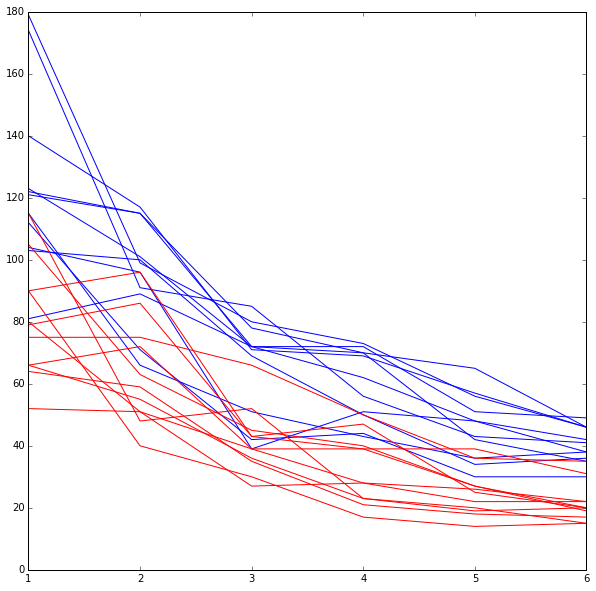

In [193]:
#look at specific tangram if desirable
test3 = test2.copy()
#test3 = test3[test3.tangram == "A"]


#groupby tangram and roundNum
wordNums = test3.groupby(['tangram', 'roundNum']).sum()


#PLOT NN parts of speech

pork_NN_A = wordNums.loc['A': 'A', 'NNnum': 'NNnum']
df_NN_A = pork_NN_A['NNnum'].tolist()

pork_NN_B = wordNums.loc['B': 'B', 'NNnum': 'NNnum']
df_NN_B = pork_NN_B['NNnum'].tolist()

pork_NN_C = wordNums.loc['C': 'C', 'NNnum': 'NNnum']
df_NN_C = pork_NN_C['NNnum'].tolist()

pork_NN_D = wordNums.loc['D': 'D', 'NNnum': 'NNnum']
df_NN_D = pork_NN_D['NNnum'].tolist()

pork_NN_E = wordNums.loc['E': 'E', 'NNnum': 'NNnum']
df_NN_E = pork_NN_E['NNnum'].tolist()

pork_NN_F = wordNums.loc['F': 'F', 'NNnum': 'NNnum']
df_NN_F = pork_NN_F['NNnum'].tolist()

pork_NN_G = wordNums.loc['G': 'G', 'NNnum': 'NNnum']
df_NN_G = pork_NN_G['NNnum'].tolist()

pork_NN_H = wordNums.loc['H': 'H', 'NNnum': 'NNnum']
df_NN_H = pork_NN_H['NNnum'].tolist()

pork_NN_I = wordNums.loc['I': 'I', 'NNnum': 'NNnum']
df_NN_I = pork_NN_I['NNnum'].tolist()

pork_NN_J = wordNums.loc['J': 'J', 'NNnum': 'NNnum']
df_NN_J = pork_NN_J['NNnum'].tolist()

pork_NN_K = wordNums.loc['K': 'K', 'NNnum': 'NNnum']
df_NN_K = pork_NN_K['NNnum'].tolist()

pork_NN_L = wordNums.loc['L': 'L', 'NNnum': 'NNnum']
df_NN_L = pork_NN_L['NNnum'].tolist()

#plotting NN
fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
NN_A = df_NN_A
NN_B = df_NN_B
NN_C = df_NN_C
NN_D = df_NN_D
NN_E = df_NN_E
NN_F = df_NN_F
NN_G = df_NN_G
NN_H = df_NN_H
NN_I = df_NN_I
NN_J = df_NN_J
NN_K = df_NN_K
NN_L = df_NN_L

plt.plot(rounds, NN_A, color='blue')
plt.plot(rounds, NN_B, color='blue')
plt.plot(rounds, NN_C, color='blue')
plt.plot(rounds, NN_D, color='blue')
plt.plot(rounds, NN_E, color='blue')
plt.plot(rounds, NN_F, color='blue')
plt.plot(rounds, NN_G, color='blue')
plt.plot(rounds, NN_H, color='blue')
plt.plot(rounds, NN_I, color='blue')
plt.plot(rounds, NN_J, color='blue')
plt.plot(rounds, NN_K, color='blue')


#PLOTTING VB

pork_VB_A = wordNums.loc['A': 'A', 'VBnum': 'VBnum']
df_VB_A = pork_VB_A['VBnum'].tolist()

pork_VB_B = wordNums.loc['B': 'B', 'VBnum': 'VBnum']
df_VB_B = pork_VB_B['VBnum'].tolist()

pork_VB_C = wordNums.loc['C': 'C', 'VBnum': 'VBnum']
df_VB_C = pork_VB_C['VBnum'].tolist()

pork_VB_D = wordNums.loc['D': 'D', 'VBnum': 'VBnum']
df_VB_D = pork_VB_D['VBnum'].tolist()

pork_VB_E = wordNums.loc['E': 'E', 'VBnum': 'VBnum']
df_VB_E = pork_VB_E['VBnum'].tolist()

pork_VB_F = wordNums.loc['F': 'F', 'VBnum': 'VBnum']
df_VB_F = pork_VB_F['VBnum'].tolist()

pork_VB_G = wordNums.loc['G': 'G', 'VBnum': 'VBnum']
df_VB_G = pork_VB_G['VBnum'].tolist()

pork_VB_H = wordNums.loc['H': 'H', 'VBnum': 'VBnum']
df_VB_H = pork_VB_H['VBnum'].tolist()

pork_VB_I = wordNums.loc['I': 'I', 'VBnum': 'VBnum']
df_VB_I = pork_VB_I['VBnum'].tolist()

pork_VB_J = wordNums.loc['J': 'J', 'VBnum': 'VBnum']
df_VB_J = pork_VB_J['VBnum'].tolist()

pork_VB_K = wordNums.loc['K': 'K', 'VBnum': 'VBnum']
df_VB_K = pork_VB_K['VBnum'].tolist()

pork_VB_L = wordNums.loc['L': 'L', 'VBnum': 'VBnum']
df_VB_L = pork_VB_L['VBnum'].tolist()

#plotting
#fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
VB_A = df_VB_A
VB_B = df_VB_B
VB_C = df_VB_C
VB_D = df_VB_D
VB_E = df_VB_E
VB_F = df_VB_F
VB_G = df_VB_G
VB_H = df_VB_H
VB_I = df_VB_I
VB_J = df_VB_J
VB_K = df_VB_K
VB_L = df_VB_L

plt.plot(rounds, VB_A, color='red')
plt.plot(rounds, VB_B, color='red')
plt.plot(rounds, VB_C, color='red')
plt.plot(rounds, VB_D, color='red')
plt.plot(rounds, VB_E, color='red')
plt.plot(rounds, VB_F, color='red')
plt.plot(rounds, VB_G, color='red')
plt.plot(rounds, VB_H, color='red')
plt.plot(rounds, VB_I, color='red')
plt.plot(rounds, VB_J, color='red')
plt.plot(rounds, VB_K, color='red')


#Graphing POS/totalWords

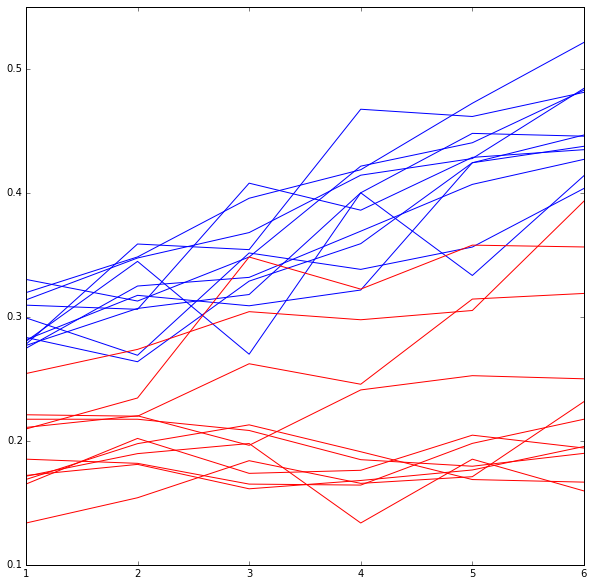

In [198]:
wordNums2 = wordNums.copy()
#calculate ratio of NN POS/total numWords
wordNums2['NNnumRat'] = wordNums2['NNnum']/wordNums2['numWords']
#calculate ratio of VB POS/total numWords
wordNums2['VBnumRat'] = wordNums2['VBnum']/wordNums2['numWords']

#RENAMING
#to make my life easier...so I can copy and past above code, I am changing the column names 
#NNnum will become NNraw and VBnum will become VBraw
wordNums2=wordNums2.rename(columns = {'NNnum':'NNraw'})
wordNums2=wordNums2.rename(columns = {'VBnum':'VBraw'})

#NNnumRat will be NNnum and VBnumRat will be VBnum
wordNums2=wordNums2.rename(columns = {'NNnumRat':'NNnum'})
wordNums2=wordNums2.rename(columns = {'VBnumRat':'VBnum'})

#now, I'm pulling the code from above to graph the ratio of NNnum and VBnum over rounds 1-6

#PLOT NN parts of speech

pork_NN_A = wordNums2.loc['A': 'A', 'NNnum': 'NNnum']
df_NN_A = pork_NN_A['NNnum'].tolist()

pork_NN_B = wordNums2.loc['B': 'B', 'NNnum': 'NNnum']
df_NN_B = pork_NN_B['NNnum'].tolist()

pork_NN_C = wordNums2.loc['C': 'C', 'NNnum': 'NNnum']
df_NN_C = pork_NN_C['NNnum'].tolist()

pork_NN_D = wordNums2.loc['D': 'D', 'NNnum': 'NNnum']
df_NN_D = pork_NN_D['NNnum'].tolist()

pork_NN_E = wordNums2.loc['E': 'E', 'NNnum': 'NNnum']
df_NN_E = pork_NN_E['NNnum'].tolist()

pork_NN_F = wordNums2.loc['F': 'F', 'NNnum': 'NNnum']
df_NN_F = pork_NN_F['NNnum'].tolist()

pork_NN_G = wordNums2.loc['G': 'G', 'NNnum': 'NNnum']
df_NN_G = pork_NN_G['NNnum'].tolist()

pork_NN_H = wordNums2.loc['H': 'H', 'NNnum': 'NNnum']
df_NN_H = pork_NN_H['NNnum'].tolist()

pork_NN_I = wordNums2.loc['I': 'I', 'NNnum': 'NNnum']
df_NN_I = pork_NN_I['NNnum'].tolist()

pork_NN_J = wordNums2.loc['J': 'J', 'NNnum': 'NNnum']
df_NN_J = pork_NN_J['NNnum'].tolist()

pork_NN_K = wordNums2.loc['K': 'K', 'NNnum': 'NNnum']
df_NN_K = pork_NN_K['NNnum'].tolist()

pork_NN_L = wordNums2.loc['L': 'L', 'NNnum': 'NNnum']
df_NN_L = pork_NN_L['NNnum'].tolist()

#plotting NN
fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
NN_A = df_NN_A
NN_B = df_NN_B
NN_C = df_NN_C
NN_D = df_NN_D
NN_E = df_NN_E
NN_F = df_NN_F
NN_G = df_NN_G
NN_H = df_NN_H
NN_I = df_NN_I
NN_J = df_NN_J
NN_K = df_NN_K
NN_L = df_NN_L

plt.plot(rounds, NN_A, color='blue')
plt.plot(rounds, NN_B, color='blue')
plt.plot(rounds, NN_C, color='blue')
plt.plot(rounds, NN_D, color='blue')
plt.plot(rounds, NN_E, color='blue')
plt.plot(rounds, NN_F, color='blue')
plt.plot(rounds, NN_G, color='blue')
plt.plot(rounds, NN_H, color='blue')
plt.plot(rounds, NN_I, color='blue')
plt.plot(rounds, NN_J, color='blue')
plt.plot(rounds, NN_K, color='blue')


#PLOTTING VB

pork_VB_A = wordNums2.loc['A': 'A', 'VBnum': 'VBnum']
df_VB_A = pork_VB_A['VBnum'].tolist()

pork_VB_B = wordNums2.loc['B': 'B', 'VBnum': 'VBnum']
df_VB_B = pork_VB_B['VBnum'].tolist()

pork_VB_C = wordNums2.loc['C': 'C', 'VBnum': 'VBnum']
df_VB_C = pork_VB_C['VBnum'].tolist()

pork_VB_D = wordNums2.loc['D': 'D', 'VBnum': 'VBnum']
df_VB_D = pork_VB_D['VBnum'].tolist()

pork_VB_E = wordNums2.loc['E': 'E', 'VBnum': 'VBnum']
df_VB_E = pork_VB_E['VBnum'].tolist()

pork_VB_F = wordNums2.loc['F': 'F', 'VBnum': 'VBnum']
df_VB_F = pork_VB_F['VBnum'].tolist()

pork_VB_G = wordNums2.loc['G': 'G', 'VBnum': 'VBnum']
df_VB_G = pork_VB_G['VBnum'].tolist()

pork_VB_H = wordNums2.loc['H': 'H', 'VBnum': 'VBnum']
df_VB_H = pork_VB_H['VBnum'].tolist()

pork_VB_I = wordNums2.loc['I': 'I', 'VBnum': 'VBnum']
df_VB_I = pork_VB_I['VBnum'].tolist()

pork_VB_J = wordNums2.loc['J': 'J', 'VBnum': 'VBnum']
df_VB_J = pork_VB_J['VBnum'].tolist()

pork_VB_K = wordNums2.loc['K': 'K', 'VBnum': 'VBnum']
df_VB_K = pork_VB_K['VBnum'].tolist()

pork_VB_L = wordNums2.loc['L': 'L', 'VBnum': 'VBnum']
df_VB_L = pork_VB_L['VBnum'].tolist()

#plotting
#fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
VB_A = df_VB_A
VB_B = df_VB_B
VB_C = df_VB_C
VB_D = df_VB_D
VB_E = df_VB_E
VB_F = df_VB_F
VB_G = df_VB_G
VB_H = df_VB_H
VB_I = df_VB_I
VB_J = df_VB_J
VB_K = df_VB_K
VB_L = df_VB_L

plt.plot(rounds, VB_A, color='red')
plt.plot(rounds, VB_B, color='red')
plt.plot(rounds, VB_C, color='red')
plt.plot(rounds, VB_D, color='red')
plt.plot(rounds, VB_E, color='red')
plt.plot(rounds, VB_F, color='red')
plt.plot(rounds, VB_G, color='red')
plt.plot(rounds, VB_H, color='red')
plt.plot(rounds, VB_I, color='red')
plt.plot(rounds, VB_J, color='red')
plt.plot(rounds, VB_K, color='red')



#Testing word count function

In [6]:
text = {'NN': [('guy', 1), ('hi', 13)], 'NNS': [('arms', 1)]}
text.values()[1][1][1]
list1 = [('guy', 1), ('hi', 1), ('yoyo', 20)]

#counts up the numbers associated with each word in a list
def total(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = l[i][1]
        print num
        count += num
        #print count
    else: 
        return count
#count up the numbers associated with each word in list of lists (need .values() for dict)
def totalAll(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = total(l[i])
        count += num
    else:
        return count
    
#totalAll(text.values())

#text.values()[1][1][0]

In [7]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#given a tag (like NN) find all the words tagged with that and their frequency
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

#tokenize contents and look at one tangram at a time and groupby gameid, tangram, roundNum, contents
test1['tokens'] = [[word for word in nltk.word_tokenize(sentence.lower()) if word.isalpha()] for sentence in test1['contents']]
test2 = test1.copy()
del test2['time']

#tag part of speech for each token
test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]


for g in ['1903-d']:
    for i in ['1', '2', '3', '4', '5', '6']:
        for t in ['A']:
            test2 = test2[(test2.tangram == t) & (test2.gameid == g) & (test2.roundNum == i)]
            #test2.groupby(['gameid', 'tangram', 'roundNum', 'contents']).sum()
            #print(test2)

            #create part of speech column
            test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]

            tags = test2['pos']
            #turn tags from series into list and flatten
            tags.tolist()
            tagsFlat = [item for sublist in tags for item in sublist]
            #tagsFlat

            #look at frequency of parts of speech 
            tags_fd = nltk.FreqDist(tag for (word, tag) in tagsFlat)
            tags_fd.most_common()

            #locate all words tagged with NN and display their frequency
            tagdictVB = findtags('VB', tagsFlat)
            tagdictNN = findtags('NN', tagsFlat)
            

            #for tag in sorted(tagdict): print(tag, tagdict[tag])
            #print(g, i, t, tagdictVB)
            #print(g, i, t, tagdictNN)
            print(tagsFlat)

    
else:
    print("All done!")


#CC, VB, DT, NN, CD


height has been deprecated.

[('and', 'CC'), ('is', 'VBZ'), ('or', 'CC'), ('a', 'DT'), ('rabbit', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('one', 'CD'), ('kicking', 'VBG')]
[]
[]
[]
[]
[]
All done!


#Plotting word frequency distribution 

In [10]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
merged.drop(['gameid','time'], axis=1)
from itertools import chain
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def tokenize(listOfStrings):
    mergedStr = []
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr)
        mergedStr.append(potato)
    flat = [item for sublist in mergedStr for item in sublist]
    return flat
#     return list(chain.from_iterable(mergedStr))

def tangram(merged, tangram, roundNum ):   ##select tangram and round you want to look at
    merged.drop(['gameid','time'], axis=1)
    tanMerged = merged[merged['tangram'] == tangram]
    tanRound = tanMerged[tanMerged['roundNum'] == roundNum]
    return tanRound

def tokTan(dataframe):       ##will tokenize the contents grouped by roundNum
    wordsCountedC1 = dataframe.groupby(['roundNum'])['contents'].aggregate(tokenize)
    return wordsCountedC1

def cleanup(listofStrings):  ##only will do one list at a time
    listofStrings = [w for w in listofStrings if w not in stopwords]
    listofStrings = [w for w in listofStrings if w.isalpha()]
    listofStrings = [w for w in listofStrings if len(w) > 2]
    listofStrings = [w.lower() for w in listofStrings if w.isalpha()] 
    listofStrings = [w for w in listofStrings if w not in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'the', 'like', 'either' 'ready', 'yeah' 'really,' 'ok', 'looks', 'okay', 'one', 'got', 'go']]
    return listofStrings

##example with tangram C on round1
tangramCr1 = tangram(merged, 'C', '1')
tokCr1 = tokTan(tangramCr1)
cleanCr1 = cleanup(tokCr1[0])
cleanCr1

##plot the frequency distribution

wordsCounted = merged.groupby(['roundNum'])['contents'].aggregate(tokenize)    #list of words in each round
cleaned1 = cleanup(wordsCounted[0])  # cleaned up list of words in round1
cleaned2 = cleanup(wordsCounted[1])
cleaned3 = cleanup(wordsCounted[2])
cleaned4 = cleanup(wordsCounted[3])
cleaned5 = cleanup(wordsCounted[4])
cleaned6 = cleanup(wordsCounted[5])

c = 0
while c < 6:
    cleanWords = cleanup(wordsCounted[c])
    c = c + 1

#cleanWords
#cleaned2

#wordsCounted
#fdist1 = nltk.FreqDist(cleaned)
#fdist1.plot(30, cumulative=False)





#  Tangram C vs G graph

[18.0, 12.0, 5.0, 6.0, 4.0, 4.0]
[31.0, 13.0, 16.0, 7.0, 5.0, 5.0]
[18.0, 12.0, 5.0, 6.0, 4.0, 4.0]
[31.0, 13.0, 16.0, 7.0, 5.0, 5.0]


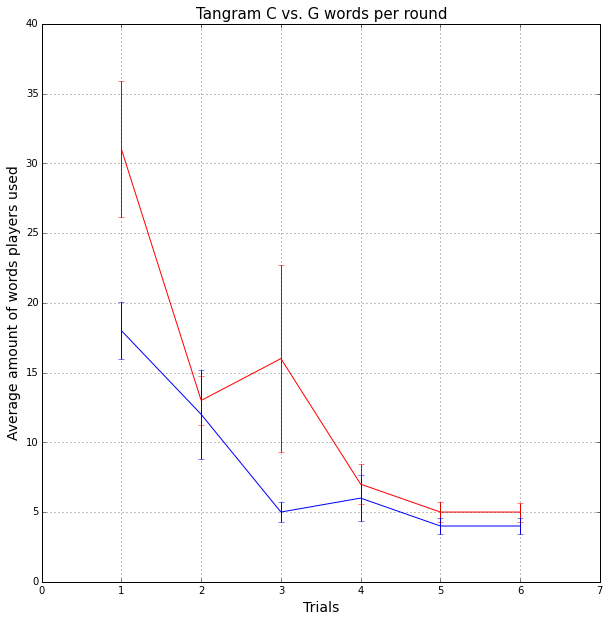

In [5]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
from itertools import chain
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def countWords(listOfStrings):
    wordCount = 0
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr) # tokenize it (returns a list of words)
        cleanPotato = cleanup(potato)
        length = len(potato)   # get length of token list
        wordCount = wordCount + length # add that number to wordCount
    return wordCount

def cleanup(aStr) :
    listofStrings = [w for w in aStr if w not in stopwords]
    listofStrings = [w for w in listofStrings if w.isalpha()]
    listofStrings = [w for w in listofStrings if len(w) > 2]
    listofStrings = [w.lower() for w in listofStrings if w.isalpha()] 
    listofStrings = [w for w in listofStrings if w not in ['like', 'either' 'ready', 'yeah' 'really,' 'ok', 'looks', 'okay', 'one', 'got', 'go']]
    return listofStrings

tanC = merged[merged['tangram'] == 'C']
tanG = merged[merged['tangram'] == 'G']

def getMean(dataframe):
    meanList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = dataframe[dataframe['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(24))
        wordMean = wordsPerRound.mean()
        meanList.append(wordMean)
    return meanList

print(getMean(tanC))
print(getMean(tanG))
# print(tanC)
# print(tanG)



def getStDev(dataframe):
    stdList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = dataframe[dataframe['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(1))
        std = wordsPerRound.std()
        stdList.append(std)
    return stdList



##df for tangram C
tanC = merged[merged['tangram'] == 'C']
wordsCountedC = tanC.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
meanC = getMean(tanC)
stErrorC = getStDev(tanC)/np.sqrt(24)
print(meanC)

%matplotlib inline


# ##df for tangram G
tanG = merged[merged['tangram'] == 'G']
wordsCountedG = tanG.groupby(['roundNum', 'gameid'])['contents'].aggregate(countWords)
meanG = getMean(tanG)
stErrorG = getStDev(tanG)/np.sqrt(24)
stErrorG
print(meanG)

##plot it
##data to be plotted
# wordsPerRound = wordsCounted.apply(lambda x: x/(12*24))
rounds = [1,2,3,4,5,6]

##error data

fig = plt.figure(figsize=(10, 10), dpi=100)

##plotting
# fig = plt.figure(figsize=(6, 6))
# axes = fig.add_subplot(111)
plt.plot(rounds, meanG, color='red')
plt.plot(rounds, meanC, color='blue')
# 
##plot error bars
plt.errorbar(rounds,meanG,yerr=stErrorG, linestyle="None", color="red")
plt.errorbar(rounds,meanC,yerr=stErrorC, linestyle="None", color="blue")




#configure x and y axes
plt.ylim([0,40])
plt.xlim([0,7])
plt.title('Tangram C vs. G words per round', size=15)
plt.grid(True)
plt.xlabel('Trials', size=14)
plt.ylabel('Average amount of words players used', size=14)

##save plot
plt.savefig("/Users/nickimaslan/Desktop/GvsCTangrams.png", bbox_inches='tight')

##show plot
plt.show()


# Avg Director word count for each tangram


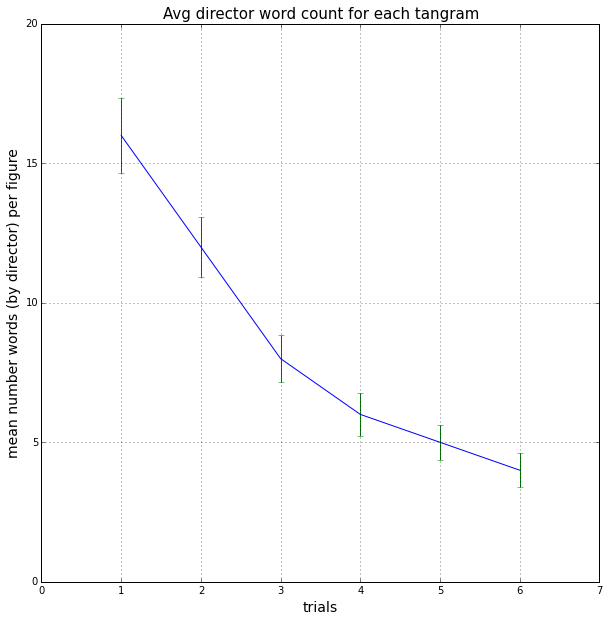

In [564]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
from itertools import chain
def countWords(listOfStrings):
    wordCount = 0
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr) # tokenize it (returns a list of words)
        length = len(potato)   # get length of token list
        wordCount = wordCount + length # add that number to wordCount
    return wordCount
        
# merged.groupby(['tangram'])['roundNum'].apply(plus1)
merged = merged[merged['sender'] == 'director']
merged = merged[merged['tangram'] != '0']
merged = merged[merged['tangram'] != '10']
merged = merged[merged['tangram'] != ':']

def getStDev(dataframe):
    stdList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = merged[merged['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(12))
        std = wordsPerRound.std()
        stdList.append(std)
    return stdList

error = np.sqrt(24)

%matplotlib inline

wordsCounted = merged.groupby(['roundNum'])['contents'].aggregate(countWords)

##data to be plotted
wordsPerRound = wordsCounted.apply(lambda x: x/(12*24))
rounds = [1,2,3,4,5,6]

##error data
stdErrorList = getStDev(merged)/error

fig = plt.figure(figsize=(10, 10), dpi=100)

##plotting
# fig = plt.figure(figsize=(6, 6))
# axes = fig.add_subplot(111)
plt.plot(rounds, wordsPerRound)

##plot error bars
plt.errorbar(rounds,wordsPerRound,yerr=stdList, linestyle="None", color="green")

#configure x and y axes
plt.ylim([0,20])
plt.xlim([0,7])
plt.title('Avg director word count for each tangram', size=15)
plt.grid(True)
plt.xlabel('trials', size=14)
plt.ylabel('mean number words (by director) per figure', size=14)

##save plot
plt.savefig("/Users/nickimaslan/Desktop/avgWordsTallFont.png", bbox_inches='tight')

##show plot
plt.show()


In [4]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
# merged.ix[0:, ['contents', 'tangram']]
tangramMerge = merged[merged['tangram'] != '0']
tangram = merged[merged['tangram'] == 'G']
tangramRound = tangram[tangram['roundNum'] == '6']
contents = tangramRound.ix[0:, ['contents']]
contents



contents
135                                   1: the yoga dude 
391                                             7 hippo
392                                                   k
567                                  10 lounging rabbit
676                                    10 dancing women
836                                        triangle man
981   mostly rectangle on left and 2 triangle edges ...
982                                                   4
1212                                      slide-n-slide
1428                        6 has large L on the bottom
1594                                     backwards L 12
1795             Demented bunny leaning back on one arm
1796                                                 11
1799                                Man vomiting in hat
1800                                                  6
2032                        8 is box falling into ditch
2033                                           alrighty
2177      4. head falling off the left side of the body
2335             4 was 1 last time, extends to the left
2496                                    11. Wide Bottom
2497                                                 ok
2573                           1 guy dragging something
2704                                             #5 neo
2850                                          dancer 10
3047                                             6 seal
3143                       11: diamond head, stretching
3288                                      11 is giraffe
3552                                       8: yoga guy?
3553                                8 would be yoga guy
3671                  12 is weird bunny with square ear
3773                         box 10 dancer facing right
3967                                     8. Bellbottoms

#Score Test

In [44]:
score_test = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/good_dropObj/0215-4.csv')
score1 = score_test[[' roundNum', ' score']]
#score_group = score1.groupby('roundNum')
score1

roundNum   score
0           1       0
1           1       0
2           1       1
3           1       2
4           1       1
5           1       2
6           1       3
7           1       3
8           1       3
9           1       3
10          1       4
11          1       5
12          1       6
13          1       7
14          1       7
15          1       9
16          1      10
17          2       1
18          2       2
19          2       3
20          2       4
21          2       5
22          2       6
23          2       7
24          2       9
25          2      10
26          2      10
27          2      10
28          2      12
29          3       1
..        ...     ...
44          4       4
45          4       5
46          4       6
47          4       7
48          4       9
49          4      10
50          4       9
51          4      10
52          4      12
53          5       1
54          5       2
55          5       3
56          5       4
57          5       5
58          5       6
59          5       7
60          5       9
61          5      10
62          5      12
63          6       2
64          6       3
65          6       5
66          6       6
67          6       7
68          6       8
69          6       8
70          6       8
71          6       9
72          6      10
73          6      12

[74 rows x 2 columns]